## Imports

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%run utils.ipynb import *

## Preprocess Data

In [58]:
# Load in the general demographics data.
azdias = pd.read_csv("C:/Users/mahmo/Desktop/Identify-Customer-Segments/input/Udacity_AZDIAS_Subset.csv",delimiter=";")

# Load in the feature summary file.
feat_info = pd.read_csv("C:/Users/mahmo/Desktop/Identify-Customer-Segments/input/AZDIAS_Feature_Summary.csv",delimiter=";")

In [59]:
cleaner = DataCleaner()
feat_info = cleaner.clean_feature_info(feat_info)
second_subset = cleaner.clean_general_data(azdias, feat_info)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_3200\1367686360.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("[",""))
C:\Users\mahmo\AppData\Local\Temp\ipykernel_3200\1367686360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_info1['missing_or_unknown'] = feat_info1['missing_or_unknown'].apply(lambda x: x.replace("]",""))
C:\Users\mahmo\AppData\Local\Temp\ipykernel_3200\1367686360.py:13: SettingWithCo

Removed Columns are: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

In [60]:
# clean the dataset of all NaN values.
missing_values_count = second_subset.isna().sum()
print('Check to see if there exist any missing values in each columns after applying the Imputation in earlier steps')
for col , count in zip(second_subset.columns, missing_values_count):
    print("The Number of values that are missing in " , col , " column is ", count)

Check to see if there exist any missing values in each columns after applying the Imputation in earlier steps
The Number of values that are missing in  ANREDE_KZ  column is  0
The Number of values that are missing in  SOHO_KZ  column is  0
The Number of values that are missing in  VERS_TYP  column is  0
The Number of values that are missing in  OST_WEST_KZ  column is  0
The Number of values that are missing in  WOHNLAGE  column is  0
The Number of values that are missing in  PLZ8_BAUMAX  column is  0
The Number of values that are missing in  GREEN_AVANTGARDE  column is  0
The Number of values that are missing in  ANZ_HAUSHALTE_AKTIV  column is  0
The Number of values that are missing in  MIN_GEBAEUDEJAHR  column is  0
The Number of values that are missing in  ANZ_PERSONEN  column is  0
The Number of values that are missing in  ANZ_TITEL  column is  0
The Number of values that are missing in  ANZ_HH_TITEL  column is  0
The Number of values that are missing in  KBA13_ANZAHL_PKW  column i

In [61]:
# Apply feature scaling to the general population demographics data.
scalar = StandardScaler()
numerical_cols = feat_info[feat_info['type'] == 'numeric'].attribute
numerical_cols = numerical_cols.apply(lambda x: x if x in second_subset.columns else np.NAN).dropna().to_list()
scalar.fit(second_subset[numerical_cols])
scaled_numerical_columns = scalar.transform(second_subset[numerical_cols])
scaled_numerical_columns = pd.DataFrame(scaled_numerical_columns, index=second_subset.index, columns=numerical_cols)
second_subset = second_subset.drop(columns=numerical_cols)
second_subset = pd.concat([second_subset, scaled_numerical_columns], axis=1)

In [62]:
# view of general demographics data after finishing the cleaning phase
second_subset.head()

,ANREDE_KZ,SOHO_KZ,VERS_TYP,OST_WEST_KZ,WOHNLAGE,PLZ8_BAUMAX,GREEN_AVANTGARDE,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,...,movement,decade,wealth,life_stage,ANZ_HAUSHALTE_AKTIV,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_TITEL,ANZ_HH_TITEL,KBA13_ANZAHL_PKW
1,2,1.0,2.0,0,4.0,1.0,0,1.0,1.0,5.0,...,0,5,4,0,0.162906,-0.385050,0.222491,-0.060769,-0.128187,1.023207
2,2,0.0,1.0,0,2.0,1.0,1,3.0,1.0,4.0,...,1,5,1,3,0.098931,-0.385050,-0.637621,-0.060769,-0.128187,0.280311
3,2,0.0,1.0,0,7.0,1.0,0,4.0,4.0,2.0,...,0,3,0,1,-0.476837,1.930656,-1.497732,-0.060769,-0.128187,-0.063019
4,1,0.0,2.0,0,3.0,2.0,0,3.0,4.0,3.0,...,0,3,3,2,-0.348888,-0.385050,1.942715,-0.060769,-0.128187,-0.539538
5,2,0.0,2.0,0,7.0,1.0,0,1.0,3.0,1.0,...,0,1,4,3,-0.220940,-0.385050,-0.637621,-0.060769,-0.128187,2.020641


Choosed to apply imputer to replace all missing values using **SimpleImputer** in earlier steps, and make different simple imputers for each feature data type, as for:
- 'ordinal features' decided to impute missing values using median strategy
- 'numeric features' decided to impute missing values using mean strategy
- 'categorical and mixed features'  decided to impute missing values using most_frequent strategy

and didn't choose to drop any data entries. 

applied feature scaling by using **StandardScaler** to numeric features only

### Step 2.2: Perform Dimensionality Reduction

In [63]:
# Apply PCA to the data.
pca = PCA()
pca.fit(second_subset)

PCA()

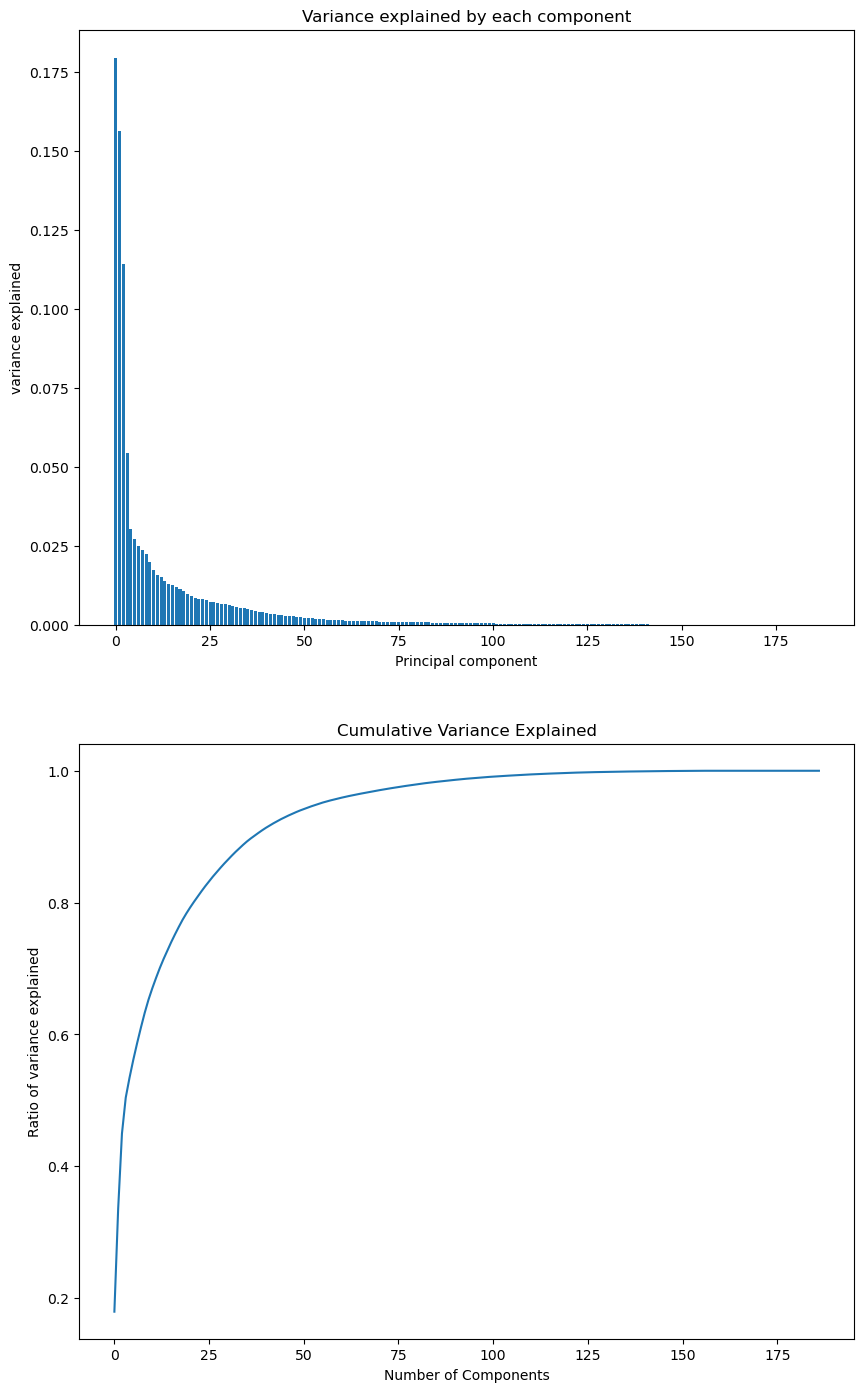

In [64]:
utils = PCAutils()
# Investigate the variance accounted for by each principal component.
variance = pca.explained_variance_ratio_
num_component = len(variance)
indices = np.arange(num_component)
cumulative_variance = np.cumsum(variance)
utils.scree_plot(indices,variance,cumulative_variance)

In [65]:
sum_variance = 0
counter = 0
for i in variance:
    if sum_variance > 0.95:
        break
    sum_variance = sum_variance + i
    counter = counter + 1
print("Cumulative Variance Explained is " , sum_variance , " and it explained by ", counter , " Component")

Cumulative Variance Explained is  0.9517710576761236  and it explained by  56  Component


In [66]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=counter)
pca.fit(second_subset)

PCA(n_components=56)

In [67]:
# transorm the data into PCA projected components
azdias_pca = pca.transform(second_subset)

Choosed to retain **56** Component, because they are achieving above **95%** Variance Explained

### Step 2.3: Interpret Principal Components

- To investigate the features, we should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list.
- we should investigate and interpret feature associations from the first three principal components in this substep.

In [68]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
PC1 = utils.pca_weights(pca, 0, second_subset.columns)
PC1

,PC0
SEMIO_REL,0.296108
SEMIO_KULT,0.268000
SEMIO_PFLICHT,0.255526
SEMIO_FAM,0.240814
SEMIO_TRADV,0.221092
...,...
ALTERSKATEGORIE_GROB,-0.150281
FINANZ_MINIMALIST,-0.152286
FINANZ_VORSORGER,-0.172760
SEMIO_LUST,-0.212787


In [69]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
PC2 = utils.pca_weights(pca, 1, second_subset.columns)
PC2

,PC1
ORTSGR_KLS9,0.349946
EWDICHTE,0.255825
SEMIO_KAEM,0.201470
PLZ8_BAUMAX,0.180738
SEMIO_ERL,0.155208
...,...
WOHNLAGE,-0.171598
SEMIO_KULT,-0.179910
MOBI_REGIO,-0.185856
BALLRAUM,-0.242591


In [70]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
PC3 = utils.pca_weights(pca, 2, second_subset.columns)
PC3

,PC2
SEMIO_VERT,0.367668
SEMIO_SOZ,0.266716
SEMIO_FAM,0.207837
SEMIO_KULT,0.176420
SEMIO_LUST,0.171186
...,...
FINANZ_ANLEGER,-0.215624
SEMIO_KRIT,-0.236312
SEMIO_RAT,-0.270949
SEMIO_DOM,-0.314388


From the first component it can be seen that:
- **SEMIO_REL** and **SEMIO_KULT** have a positive correlation (both have a positive sign),  it indicates that when personality typology increases, it tends to have more better personality typology in the other
- **SEMIO_LUST** and **FINANZ_VORSORGER** have a positive correlation (both have a negative sign), it indicates that when personality typology increases, it tends to have better financial typology
- **SEMIO_ERL** and **SEMIO_REL** have a negative correlation (the first has negative sign while the second has positive sign), it indicates that when personality typology increases, it tends to have more lower personality typology in the other